In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.contingency_tables import Table2x2
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go





In [104]:

# Load data
Cole = pd.read_csv("cole_data.csv")

Ohtani = pd.read_csv("ohtani_data.csv")

Blake = pd.read_csv("blake_data.csv")

Logan = pd.read_csv("logan_data.csv")

# Combine all data
all_data = pd.concat([Ohtani, Cole, Logan, Blake], keys=['Ohtani', 'Cole', 'Logan', 'Blake'], names=['Pitcher'])

In [105]:
Ohtani_pitch_type_table = Ohtani['pitch_type'].value_counts().reset_index()
Ohtani_pitch_type_table.columns = ['pitch_type', 'count']

Ohtani_pitch_type_table

,pitch_type,count
0,ST,737
1,FF,690
2,FC,329
3,FS,131
4,SI,126
5,CU,76
6,SL,5


In [106]:
Cole_pitch_type_table = Cole['pitch_type'].value_counts().reset_index()
Cole_pitch_type_table.columns = ['pitch_type', 'count']

Cole_pitch_type_table

,pitch_type,count
0,FF,1739
1,SL,683
2,KC,396
3,CH,233
4,FC,230


In [107]:
Blake_pitch_type_table = Blake['pitch_type'].value_counts().reset_index()
Blake_pitch_type_table.columns = ['pitch_type', 'count']


Blake_pitch_type_table

,pitch_type,count
0,FF,1541
1,CU,627
2,CH,584
3,SL,416


In [137]:
Logan_pitch_type_table = Logan['pitch_type'].value_counts().reset_index() 
Logan_pitch_type_table.columns = ['pitch_type', 'count']

Logan_pitch_type_table

,pitch_type,count
0,CH,1324
1,SI,1068
2,ST,673
3,FF,117


In [139]:
Ohtani_pitch_type_table['Player'] = 'Ohtani'
Cole_pitch_type_table['Player'] = 'Cole'
Blake_pitch_type_table['Player'] = 'Blake'
Logan_pitch_type_table['Player'] = 'Logan'

# Combining all pitch type tables into one dataframe
combined_data = pd.concat([Ohtani_pitch_type_table, Cole_pitch_type_table, Blake_pitch_type_table, Logan_pitch_type_table])

# Creating a pivot table to show the count of each pitch type for each player
contingency_table = pd.pivot_table(combined_data, values='count', index='pitch_type', columns='Player', fill_value=0)

# Display the contingency table
print(contingency_table)

Player      Blake  Cole  Logan  Ohtani
pitch_type                            
CH            584   233   1324       0
CU            627     0      0      76
FC              0   230      0     329
FF           1541  1739    117     690
FS              0     0      0     131
KC              0   396      0       0
SI              0     0   1068     126
SL            416   683      0       5
ST              0     0    673     737


In [151]:
Ohtani_FF = Ohtani[(Ohtani['pitch_type'] == 'FF')]

# Find the maximum release speed for these filtered pitches
Ohtani_FF_speed = sum(Ohtani_FF['release_speed'])/len(Ohtani_FF)

print("The average ball speed for Ohtani's FF pitch is:", Ohtani_FF_speed)

The average ball speed for Ohtani's FF pitch is: 96.78782608695647


In [149]:
Cole_FF = Cole[(Cole['pitch_type'] == 'FF')]

# Find the maximum release speed for these filtered pitches
Cole_FF_speed = sum(Cole_FF['release_speed'])/len(Cole_FF)

print("The average ball speed for Cole's FF pitch is:", Cole_FF_speed)

The average ball speed for Cole's FF pitch is: 96.65520414031049


In [147]:
Blake_FF = Blake[(Blake['pitch_type'] == 'FF')]

# Find the maximum release speed for these filtered pitches
Blake_FF_speed = sum(Blake_FF['release_speed'])/len(Blake_FF)

print("The average ball speed for Blake's FF pitch is:", Blake_FF_speed)

The average ball speed for Blake's FF pitch is: 95.51077222582752


In [145]:
## Logan specialize in chnage up which are slow pitches


Logan_FF = Logan[(Logan['pitch_type'] == 'FF')]

# Find the maximum release speed for these filtered pitches
Logan_FF_speed = sum(Logan_FF['release_speed'])/len(Logan_FF)

print("The average ball speed for Logan's FF pitch is:", Logan_FF_speed)

The average ball speed for Logan's FF pitch is: 92.6401709401709


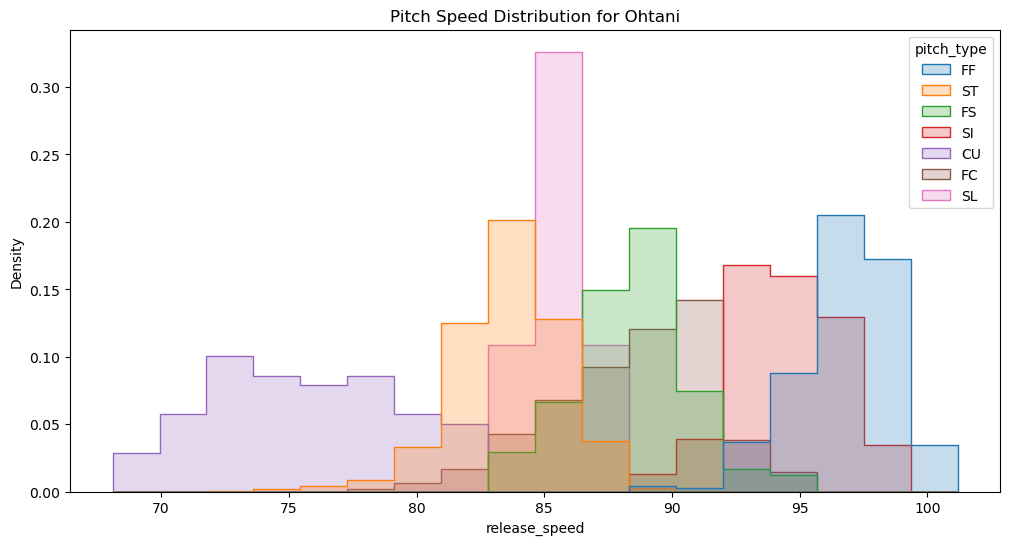

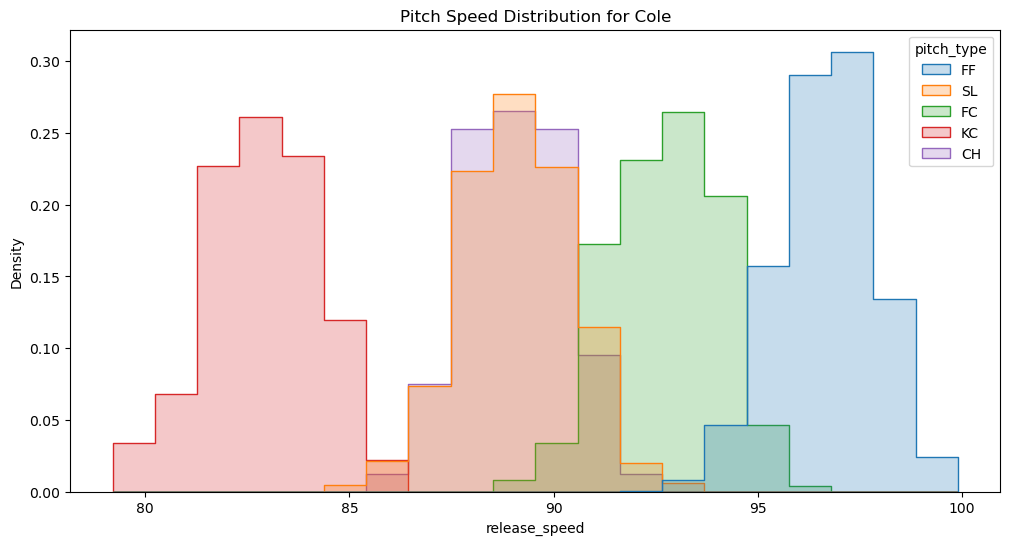

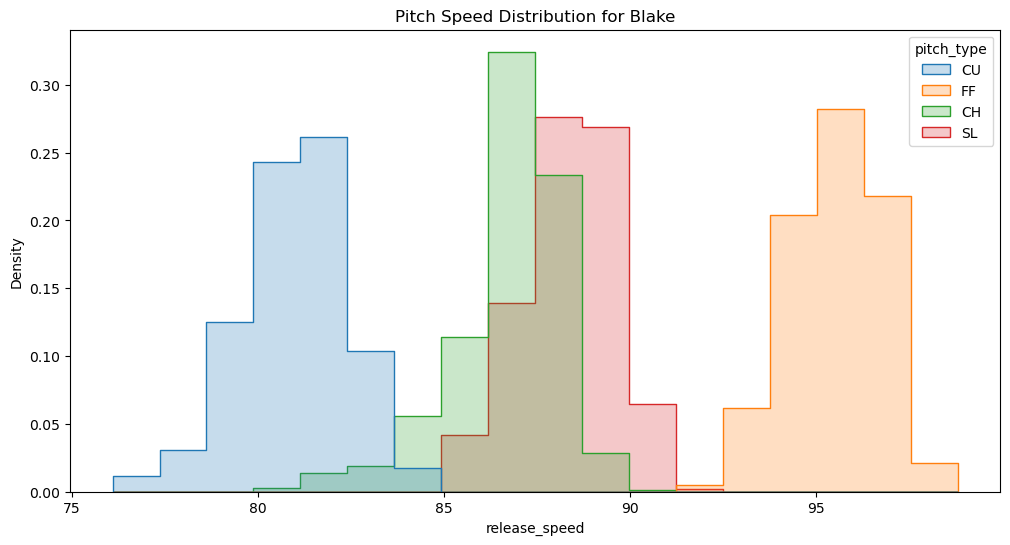

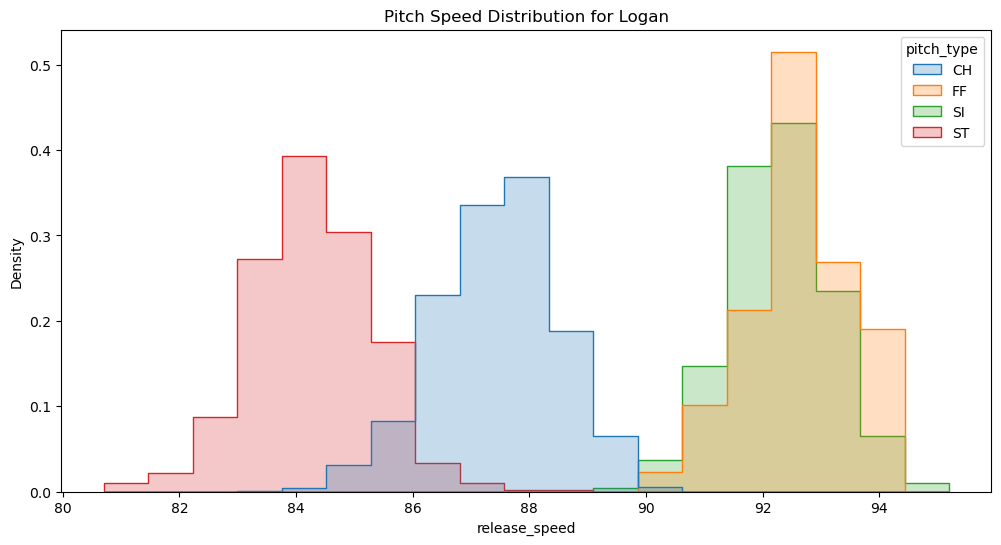

In [154]:


# Distribution of pitch speeds for Ohtani
plt.figure(figsize=(12, 6))
sns.histplot(Ohtani, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Ohtani')
plt.show()

# Distribution of pitch speeds for Cole
plt.figure(figsize=(12, 6))
sns.histplot(Cole, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Cole')
plt.show()

# Distribution of pitch speeds for Blake
plt.figure(figsize=(12, 6))
sns.histplot(Blake, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Blake')
plt.show()

# Distribution of pitch speeds for Logan
plt.figure(figsize=(12, 6))
sns.histplot(Logan, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Logan')
plt.show()

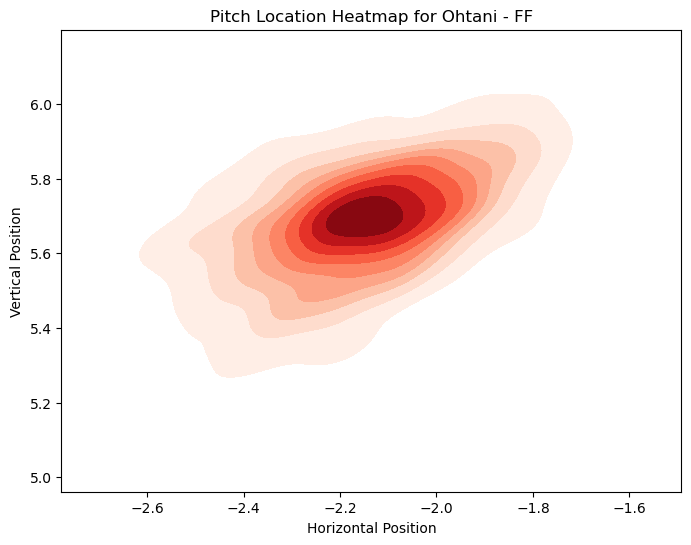

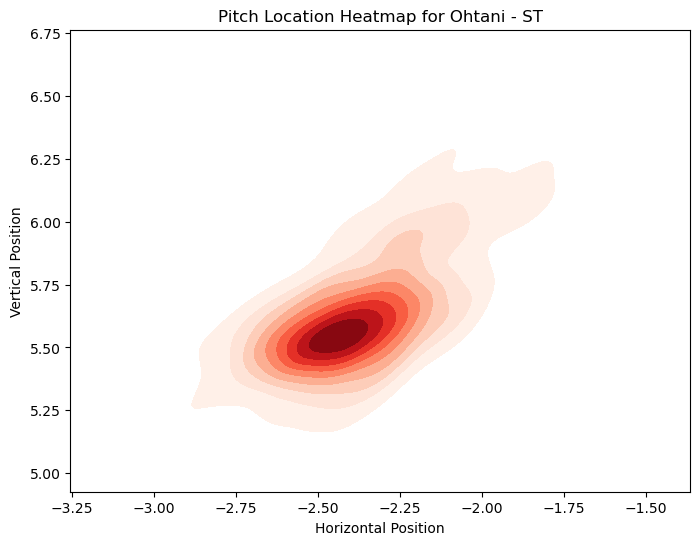

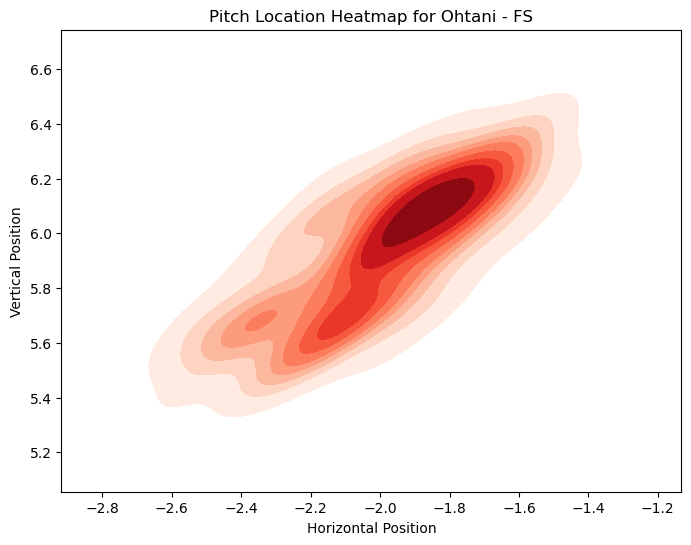

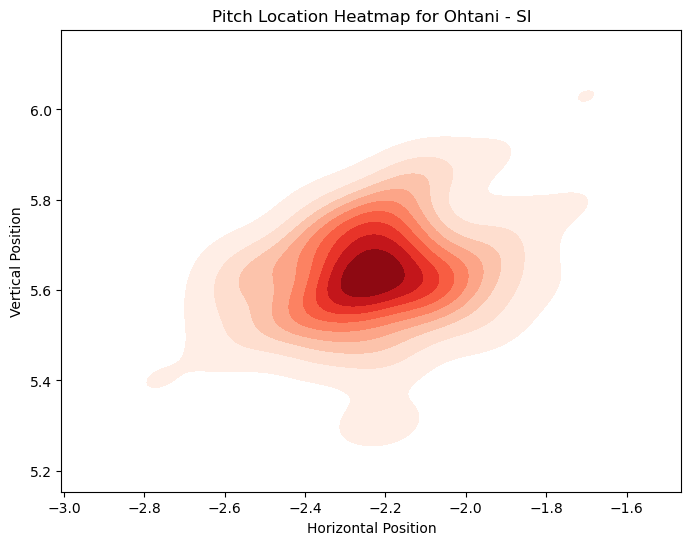

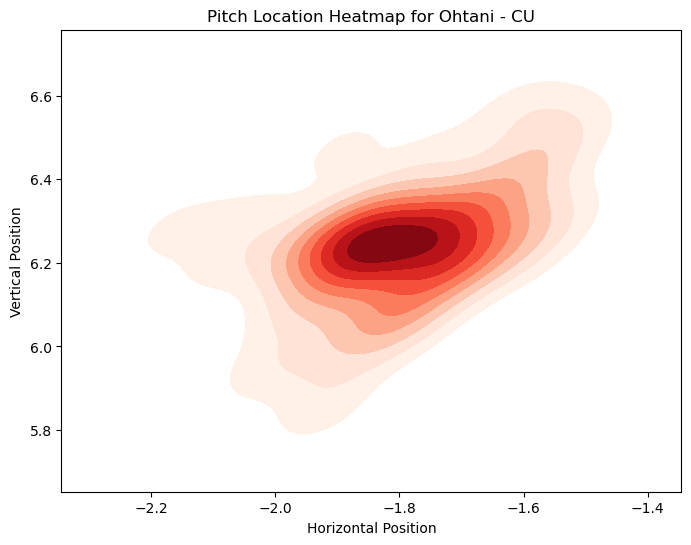

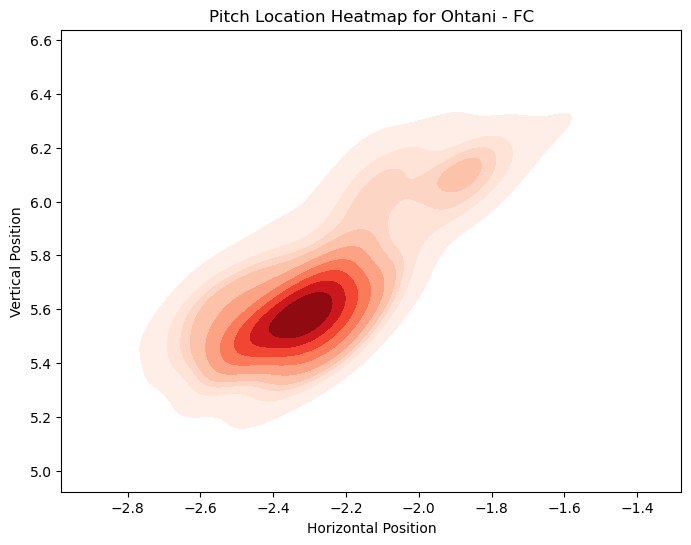

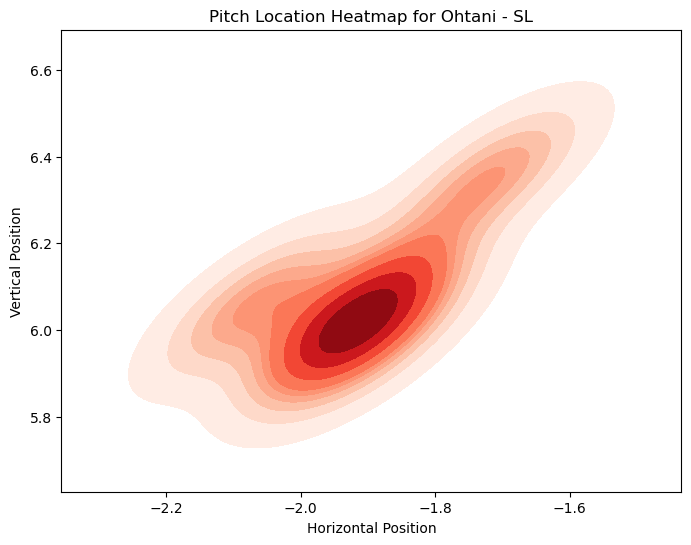

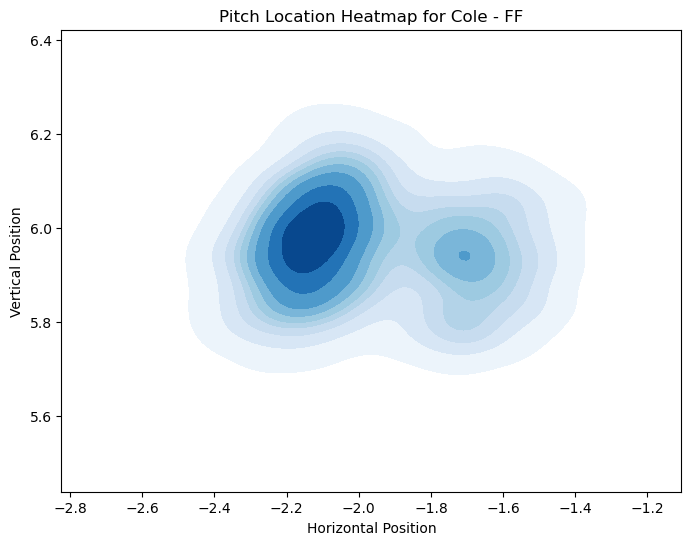

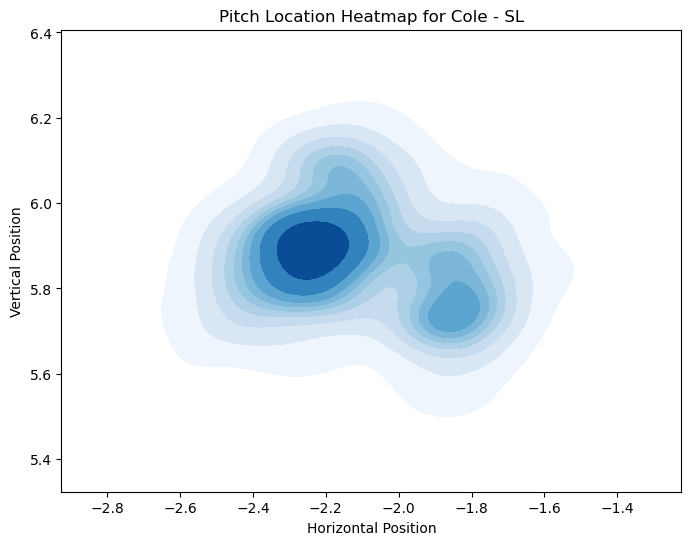

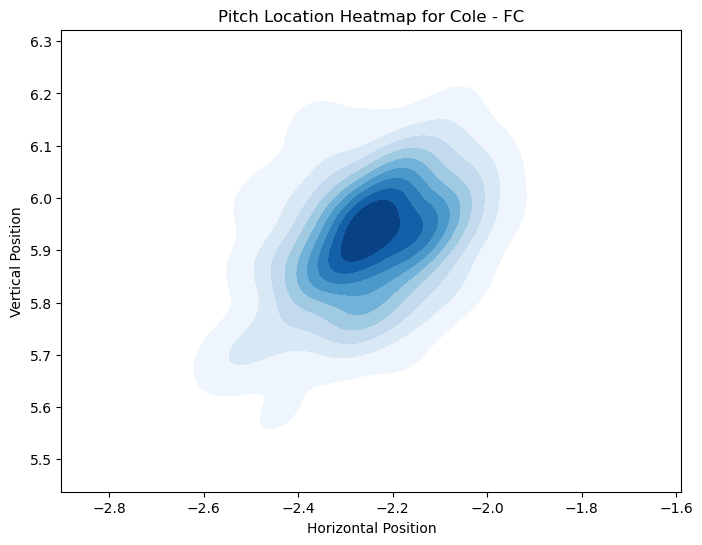

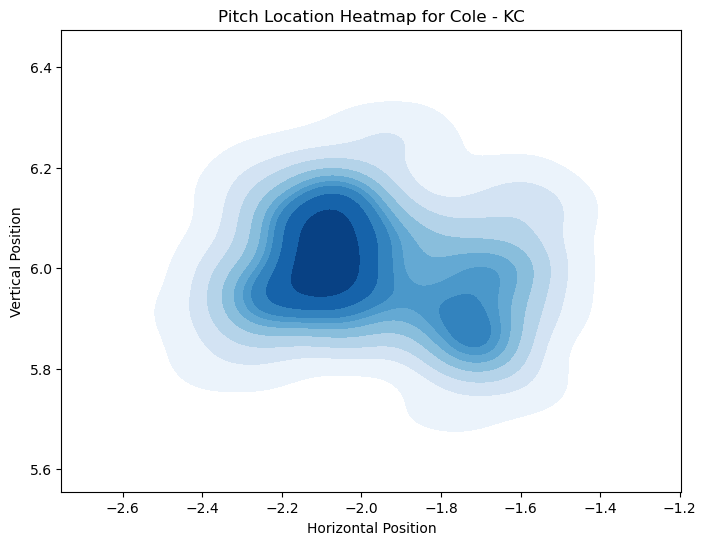

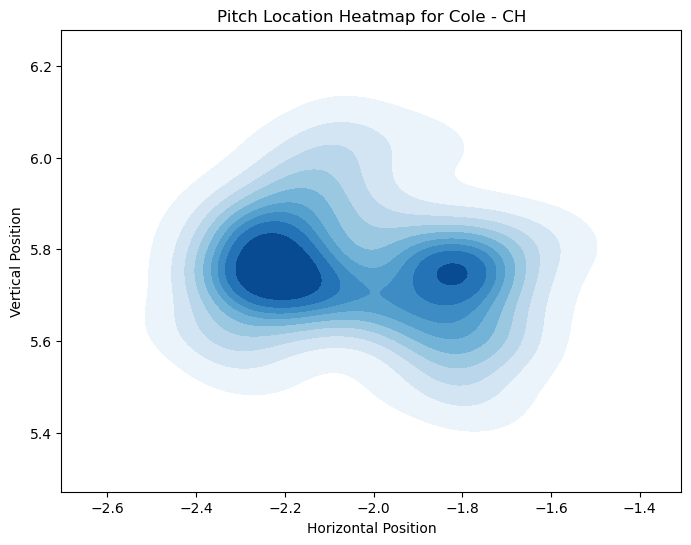

In [110]:
# Heatmaps of pitch locations for Ohtani

for pitch in Ohtani['pitch_type'].unique():
    plt.figure(figsize=(8, 6))
    pitch_data = Ohtani[Ohtani['pitch_type'] == pitch]
    sns.kdeplot(x=pitch_data['release_pos_x'], y=pitch_data['release_pos_z'], cmap='Reds', fill=True)
    plt.title(f'Pitch Location Heatmap for Ohtani - {pitch}')
    plt.xlabel('Horizontal Position')
    plt.ylabel('Vertical Position')
    plt.show()

# Heatmaps of pitch locations for Cole
for pitch in Cole['pitch_type'].unique():
    plt.figure(figsize=(8, 6))
    pitch_data = Cole[Cole['pitch_type'] == pitch]
    sns.kdeplot(x=pitch_data['release_pos_x'], y=pitch_data['release_pos_z'], cmap='Blues', fill=True)
    plt.title(f'Pitch Location Heatmap for Cole - {pitch}')
    plt.xlabel('Horizontal Position')
    plt.ylabel('Vertical Position')
    plt.show()


In [111]:


# Create a list of unique pitch types for both players
ohtani_pitch_types = Ohtani['pitch_type'].unique()
cole_pitch_types = Cole['pitch_type'].unique()
all_pitch_types = sorted(set(ohtani_pitch_types).union(cole_pitch_types))

# Define a function to plot the heatmaps
def plot_heatmaps(pitch_type):
    # Plot heatmap for Ohtani
    if pitch_type in ohtani_pitch_types:
        pitch_data_ohtani = Ohtani[Ohtani['pitch_type'] == pitch_type]
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.kdeplot(x=pitch_data_ohtani['release_pos_x'], y=pitch_data_ohtani['release_pos_z'], cmap='Reds', fill=True)
        plt.title(f'Pitch Location Heatmap for Ohtani - {pitch_type}')
        plt.xlabel('Horizontal Position')
        plt.ylabel('Vertical Position')
    
    # Plot heatmap for Cole
    if pitch_type in cole_pitch_types:
        pitch_data_cole = Cole[Cole['pitch_type'] == pitch_type]
        plt.subplot(1, 2, 2)
        sns.kdeplot(x=pitch_data_cole['release_pos_x'], y=pitch_data_cole['release_pos_z'], cmap='Blues', fill=True)
        plt.title(f'Pitch Location Heatmap for Cole - {pitch_type}')
        plt.xlabel('Horizontal Position')
        plt.ylabel('Vertical Position')
    
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for pitch types
pitch_type_dropdown = widgets.Dropdown(
    options=all_pitch_types,
    value=all_pitch_types[0],
    description='Pitch Type:',
)

# Use ipywidgets interact to update heatmaps based on dropdown selection
interact(plot_heatmaps, pitch_type=pitch_type_dropdown)


interactive(children=(Dropdown(description='Pitch Type:', options=('CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', '…

<function __main__.plot_heatmaps(pitch_type)>

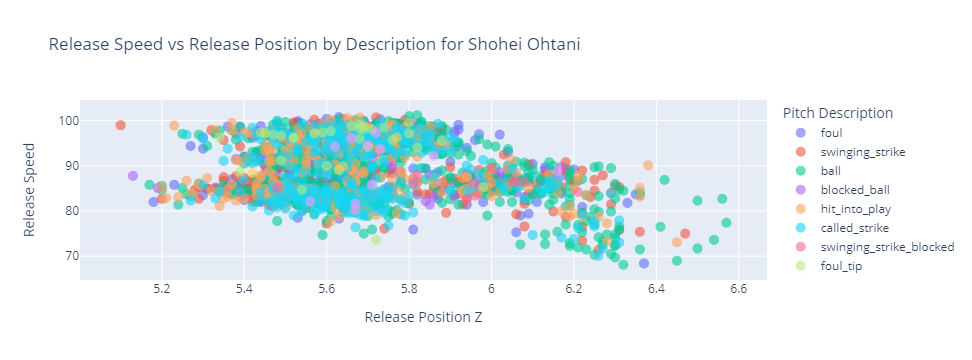

In [112]:



# Filter out rows with missing descriptions
filtered_df = Ohtani.dropna(subset=['description'])

# Create the interactive scatter plot
fig = px.scatter(
    filtered_df,
    x='release_pos_z',
    y='release_speed',
    color='description',
    title='Release Speed vs Release Position by Description for Shohei Ohtani',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_z': 'Release Position Z',
        'description': 'Pitch Description'
    }
)

# Update layout to add hover interaction
fig.update_traces(marker=dict(size=10, opacity=0.6), 
                  selector=dict(mode='markers'))

# Add custom hover interaction
fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(bgcolor="white", font_size=16)
)

fig.show()

In [113]:
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown

# Create a list of unique pitch types for both players
ohtani_pitch_types = Ohtani['pitch_type'].unique()
cole_pitch_types = Cole['pitch_type'].unique()
all_pitch_types = sorted(set(ohtani_pitch_types).union(cole_pitch_types))

# Define a function to create 3D scatter plots
def plot_3d_heatmaps(pitch_type):
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]], subplot_titles=[f'Ohtani - {pitch_type}', f'Cole - {pitch_type}'])
    
    if pitch_type in ohtani_pitch_types:
        pitch_data_ohtani = Ohtani[Ohtani['pitch_type'] == pitch_type]
        fig.add_trace(
            go.Scatter3d(
                x=pitch_data_ohtani['release_pos_x'], 
                y=pitch_data_ohtani['release_pos_z'], 
                z=pitch_data_ohtani['release_speed'], 
                mode='markers',
                marker=dict(size=4, color=pitch_data_ohtani['release_speed'], colorscale='Reds', opacity=0.8),
                name=f'Ohtani - {pitch_type}'
            ),
            row=1, col=1
        )
    
    if pitch_type in cole_pitch_types:
        pitch_data_cole = Cole[Cole['pitch_type'] == pitch_type]
        fig.add_trace(
            go.Scatter3d(
                x=pitch_data_cole['release_pos_x'], 
                y=pitch_data_cole['release_pos_z'], 
                z=pitch_data_cole['release_speed'], 
                mode='markers',
                marker=dict(size=4, color=pitch_data_cole['release_speed'], colorscale='Blues', opacity=0.8),
                name=f'Cole - {pitch_type}'
            ),
            row=1, col=2
        )
    
    fig.update_layout(
        height=600, width=1200,
        title_text=f'3D Pitch Location and Speed: {pitch_type}',
        showlegend=False
    )
    
    fig.show()

# Create a dropdown widget for pitch types
pitch_type_dropdown = Dropdown(
    options=all_pitch_types,
    value=all_pitch_types[0],
    description='Pitch Type:',
)

# Use ipywidgets interact to update 3D plots based on dropdown selection
interact(plot_3d_heatmaps, pitch_type=pitch_type_dropdown)


interactive(children=(Dropdown(description='Pitch Type:', options=('CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', '…

<function __main__.plot_3d_heatmaps(pitch_type)>

In [164]:
import pandas as pd
import plotly.graph_objects as go

# Filter out rows with missing descriptions
filtered_df = Ohtani.dropna(subset=['description'])

# Create the interactive 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=filtered_df['release_pos_x'],
    y=filtered_df['release_pos_z'],
    z=filtered_df['release_speed'],
    mode='markers',
    marker=dict(
        size=5,
        color=filtered_df['release_speed'], # Set color to release speed for gradient
        colorscale='Viridis', # Choose a colorscale
        opacity=0.8
    ),
    text=filtered_df['description'], # Use pitch description for hover text
    hoverinfo='text'
))

# Update layout to add title and labels
fig.update_layout(
    title='3D Scatter Plot of Release Speed and Position for Shohei Ohtani',
    scene=dict(
        xaxis_title='Release Position X',
        yaxis_title='Release Position Z',
        zaxis_title='Release Speed'
    ),
    hovermode='closest'
)

# Show the plot
fig.show()


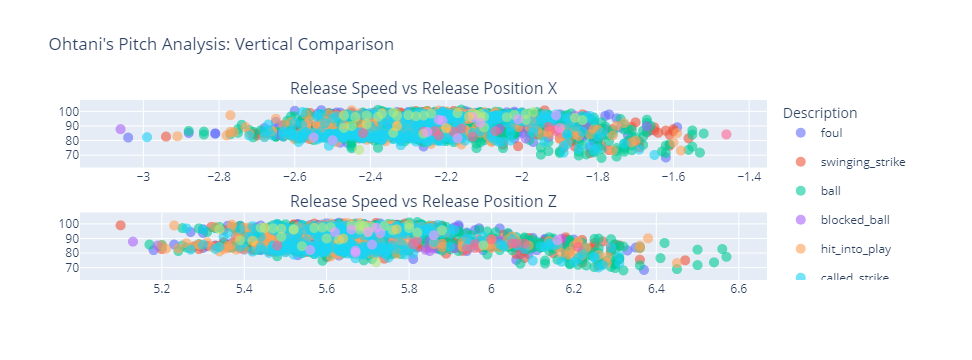

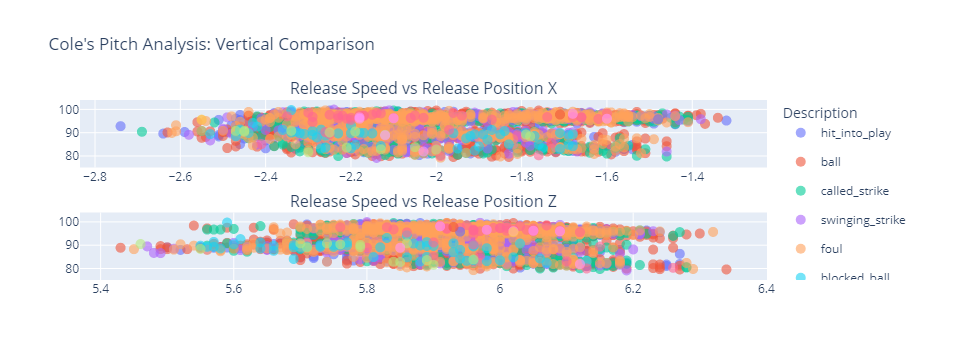

In [115]:


filtered_df = Ohtani.dropna(subset=['description'])
filtered_df = Ohtani.dropna(subset=['description'])

fig = make_subplots(rows=2, cols=1, subplot_titles=("Release Speed vs Release Position X", "Release Speed vs Release Position Z"))


fig_px = px.scatter(
    filtered_df,
    x='release_pos_x',
    y='release_speed',
    color='description',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_x': 'Release Position X',
        'description': 'Pitch Description'
    }
)

fig_pz = px.scatter(
    filtered_df,
    x='release_pos_z',
    y='release_speed',
    color='description',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_z': 'Release Position Z',
        'description': 'Pitch Description'
    }
)


for trace in fig_px.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_pz.data:
    trace.showlegend = False
    fig.add_trace(trace, row=2, col=1)


fig.update_traces(marker=dict(size=10, opacity=0.6), selector=dict(mode='markers'))
fig.update_layout(hovermode='closest', hoverlabel=dict(bgcolor="white", font_size=16), legend_title_text='Description')


fig.update_layout(title_text="Ohtani's Pitch Analysis: Vertical Comparison", showlegend=True)


fig.show()
filtered_df = Cole.dropna(subset=['description'])

fig = make_subplots(rows=2, cols=1, subplot_titles=("Release Speed vs Release Position X", "Release Speed vs Release Position Z"))


fig_px = px.scatter(
    filtered_df,
    x='release_pos_x',
    y='release_speed',
    color='description',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_x': 'Release Position X',
        'description': 'Pitch Description'
    }
)

fig_pz = px.scatter(
    filtered_df,
    x='release_pos_z',
    y='release_speed',
    color='description',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_z': 'Release Position Z',
        'description': 'Pitch Description'
    }
)


for trace in fig_px.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_pz.data:
    trace.showlegend = False
    fig.add_trace(trace, row=2, col=1)


fig.update_traces(marker=dict(size=10, opacity=0.6), selector=dict(mode='markers'))
fig.update_layout(hovermode='closest', hoverlabel=dict(bgcolor="white", font_size=16), legend_title_text='Description')


fig.update_layout(title_text="Cole's Pitch Analysis: Vertical Comparison", showlegend=True)


fig.show()

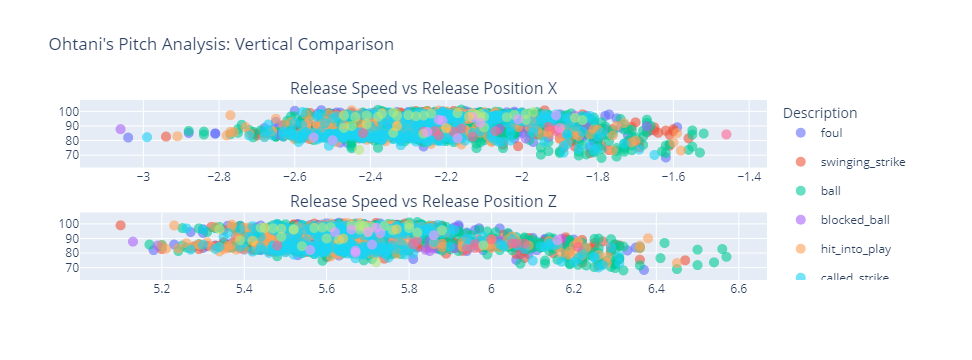

In [116]:


filtered_df = Ohtani.dropna(subset=['description'])

fig = make_subplots(rows=2, cols=1, subplot_titles=("Release Speed vs Release Position X", "Release Speed vs Release Position Z"))


fig_px = px.scatter(
    filtered_df,
    x='release_pos_x',
    y='release_speed',
    color='description',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_x': 'Release Position X',
        'description': 'Pitch Description'
    }
)

fig_pz = px.scatter(
    filtered_df,
    x='release_pos_z',
    y='release_speed',
    color='description',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_z': 'Release Position Z',
        'description': 'Pitch Description'
    }
)


for trace in fig_px.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_pz.data:
    trace.showlegend = False
    fig.add_trace(trace, row=2, col=1)


fig.update_traces(marker=dict(size=10, opacity=0.6), selector=dict(mode='markers'))
fig.update_layout(hovermode='closest', hoverlabel=dict(bgcolor="white", font_size=16), legend_title_text='Description')


fig.update_layout(title_text="Ohtani's Pitch Analysis: Vertical Comparison", showlegend=True)


fig.show()

In [117]:


# Filter out rows with missing descriptions
filtered_df = Ohtani.dropna(subset=['description'])

# Unique pitch types for the dropdown
pitch_types = filtered_df['pitch_type'].unique()

# Function to create the plot based on selected pitch type
def plot_pitch_analysis(pitch_type):
    filtered_data = filtered_df[filtered_df['pitch_type'] == pitch_type]
    
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Release Speed vs Release Position X", "Release Speed vs Release Position Z"))
    
    fig_px = px.scatter(
        filtered_data,
        x='release_pos_x',
        y='release_speed',
        color='description',
        labels={
            'release_speed': 'Release Speed',
            'release_pos_x': 'Release Position X',
            'description': 'Pitch Description'
        }
    )
    
    fig_pz = px.scatter(
        filtered_data,
        x='release_pos_z',
        y='release_speed',
        color='description',
        labels={
            'release_speed': 'Release Speed',
            'release_pos_z': 'Release Position Z',
            'description': 'Pitch Description'
        }
    )
    
    for trace in fig_px.data:
        fig.add_trace(trace, row=1, col=1)
    
    for trace in fig_pz.data:
        trace.showlegend = False
        fig.add_trace(trace, row=2, col=1)
    
    fig.update_traces(marker=dict(size=10, opacity=0.6), selector=dict(mode='markers'))
    fig.update_layout(hovermode='closest', hoverlabel=dict(bgcolor="white", font_size=16), legend_title_text='Description')
    fig.update_layout(title_text=f"Ohtani's Pitch Analysis: {pitch_type} Comparison", showlegend=True)
    
    fig.show()

# Create a dropdown widget for pitch types
pitch_type_dropdown = Dropdown(
    options=pitch_types,
    value=pitch_types[0],
    description='Pitch Type:',
)

# Use ipywidgets interact to update the plot based on dropdown selection
interact(plot_pitch_analysis, pitch_type=pitch_type_dropdown)


interactive(children=(Dropdown(description='Pitch Type:', options=('FF', 'ST', 'FS', 'SI', 'CU', 'FC', 'SL'), …

<function __main__.plot_pitch_analysis(pitch_type)>

In [118]:




filtered_df = Cole.dropna(subset=['description'])

# Unique pitch types for the dropdown
pitch_types = filtered_df['pitch_type'].unique()

# Function to create the plot based on selected pitch type
def plot_pitch_analysis(pitch_type):
    filtered_data = filtered_df[filtered_df['pitch_type'] == pitch_type]
    
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Release Speed vs Release Position X", "Release Speed vs Release Position Z"))
    
    fig_px = px.scatter(
        filtered_data,
        x='release_pos_x',
        y='release_speed',
        color='description',
        labels={
            'release_speed': 'Release Speed',
            'release_pos_x': 'Release Position X',
            'description': 'Pitch Description'
        }
    )
    
    fig_pz = px.scatter(
        filtered_data,
        x='release_pos_z',
        y='release_speed',
        color='description',
        labels={
            'release_speed': 'Release Speed',
            'release_pos_z': 'Release Position Z',
            'description': 'Pitch Description'
        }
    )
    
    for trace in fig_px.data:
        fig.add_trace(trace, row=1, col=1)
    
    for trace in fig_pz.data:
        trace.showlegend = False
        fig.add_trace(trace, row=2, col=1)
    
    fig.update_traces(marker=dict(size=10, opacity=0.6), selector=dict(mode='markers'))
    fig.update_layout(hovermode='closest', hoverlabel=dict(bgcolor="white", font_size=16), legend_title_text='Description')
    fig.update_layout(title_text=f"Cole's Pitch Analysis: {pitch_type} Comparison", showlegend=True)
    
    fig.show()

# Create a dropdown widget for pitch types
pitch_type_dropdown = Dropdown(
    options=pitch_types,
    value=pitch_types[0],
    description='Pitch Type:',
)

# Use ipywidgets interact to update the plot based on dropdown selection
interact(plot_pitch_analysis, pitch_type=pitch_type_dropdown)

interactive(children=(Dropdown(description='Pitch Type:', options=('FF', 'SL', 'FC', 'KC', 'CH'), value='FF'),…

<function __main__.plot_pitch_analysis(pitch_type)>